In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

Load the dataset

In [2]:
os.getcwd()
os.chdir(r'C:\Users\wanhe\Desktop\Boston_end to end project')
os.getcwd()

'C:\\Users\\wanhe\\Desktop\\Boston_end to end project'

In [3]:
boston=pd.read_csv('BostonHousing.csv')
type(boston)

pandas.core.frame.DataFrame

In [4]:
# Boston Housing Dataset Features:
# crim: Per capita crime rate by town
# zn: Proportion of residential land zoned for lots over 25,000 sq.ft
# indus: Proportion of non-retail business acres per town
# chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# nox: Nitric oxides concentration (parts per 10 million)
# rm: Average number of rooms per dwelling
# age: Proportion of owner-occupied units built prior to 1940
# dis: Weighted distances to five Boston employment centers
# rad: Index of accessibility to radial highways
# tax: Full-value property-tax rate per $10,000
# ptratio: Pupil-teacher ratio by town
# b: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
# lstat: % lower status of the population
# medv: Median value of owner-occupied homes in $1000's
print(boston.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
print(boston.values)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [6]:
print(boston.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [7]:
print(boston.medv)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


Preapring the datasets

In [8]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
boston['Price']=boston.medv

In [10]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [11]:
type(boston)

pandas.core.frame.DataFrame

In [12]:
boston.drop('medv',axis=1,inplace=True)

In [13]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [15]:
#summarizing the stats od the data
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
#check missing values
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

#EDA

#by default correlation is pearson-Chexks relation between x & y in such a way whether it'll say positively correlated or negatively correlated 
or not ata ll correlated o/p of person correlation ranges b/w -1 to 1 the value towards +1 more correlated it is,more the value towards negative 1
it is negative coorrelated and it is close to 0 it is not correlated

In [17]:
#Correlation
boston.corr() 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


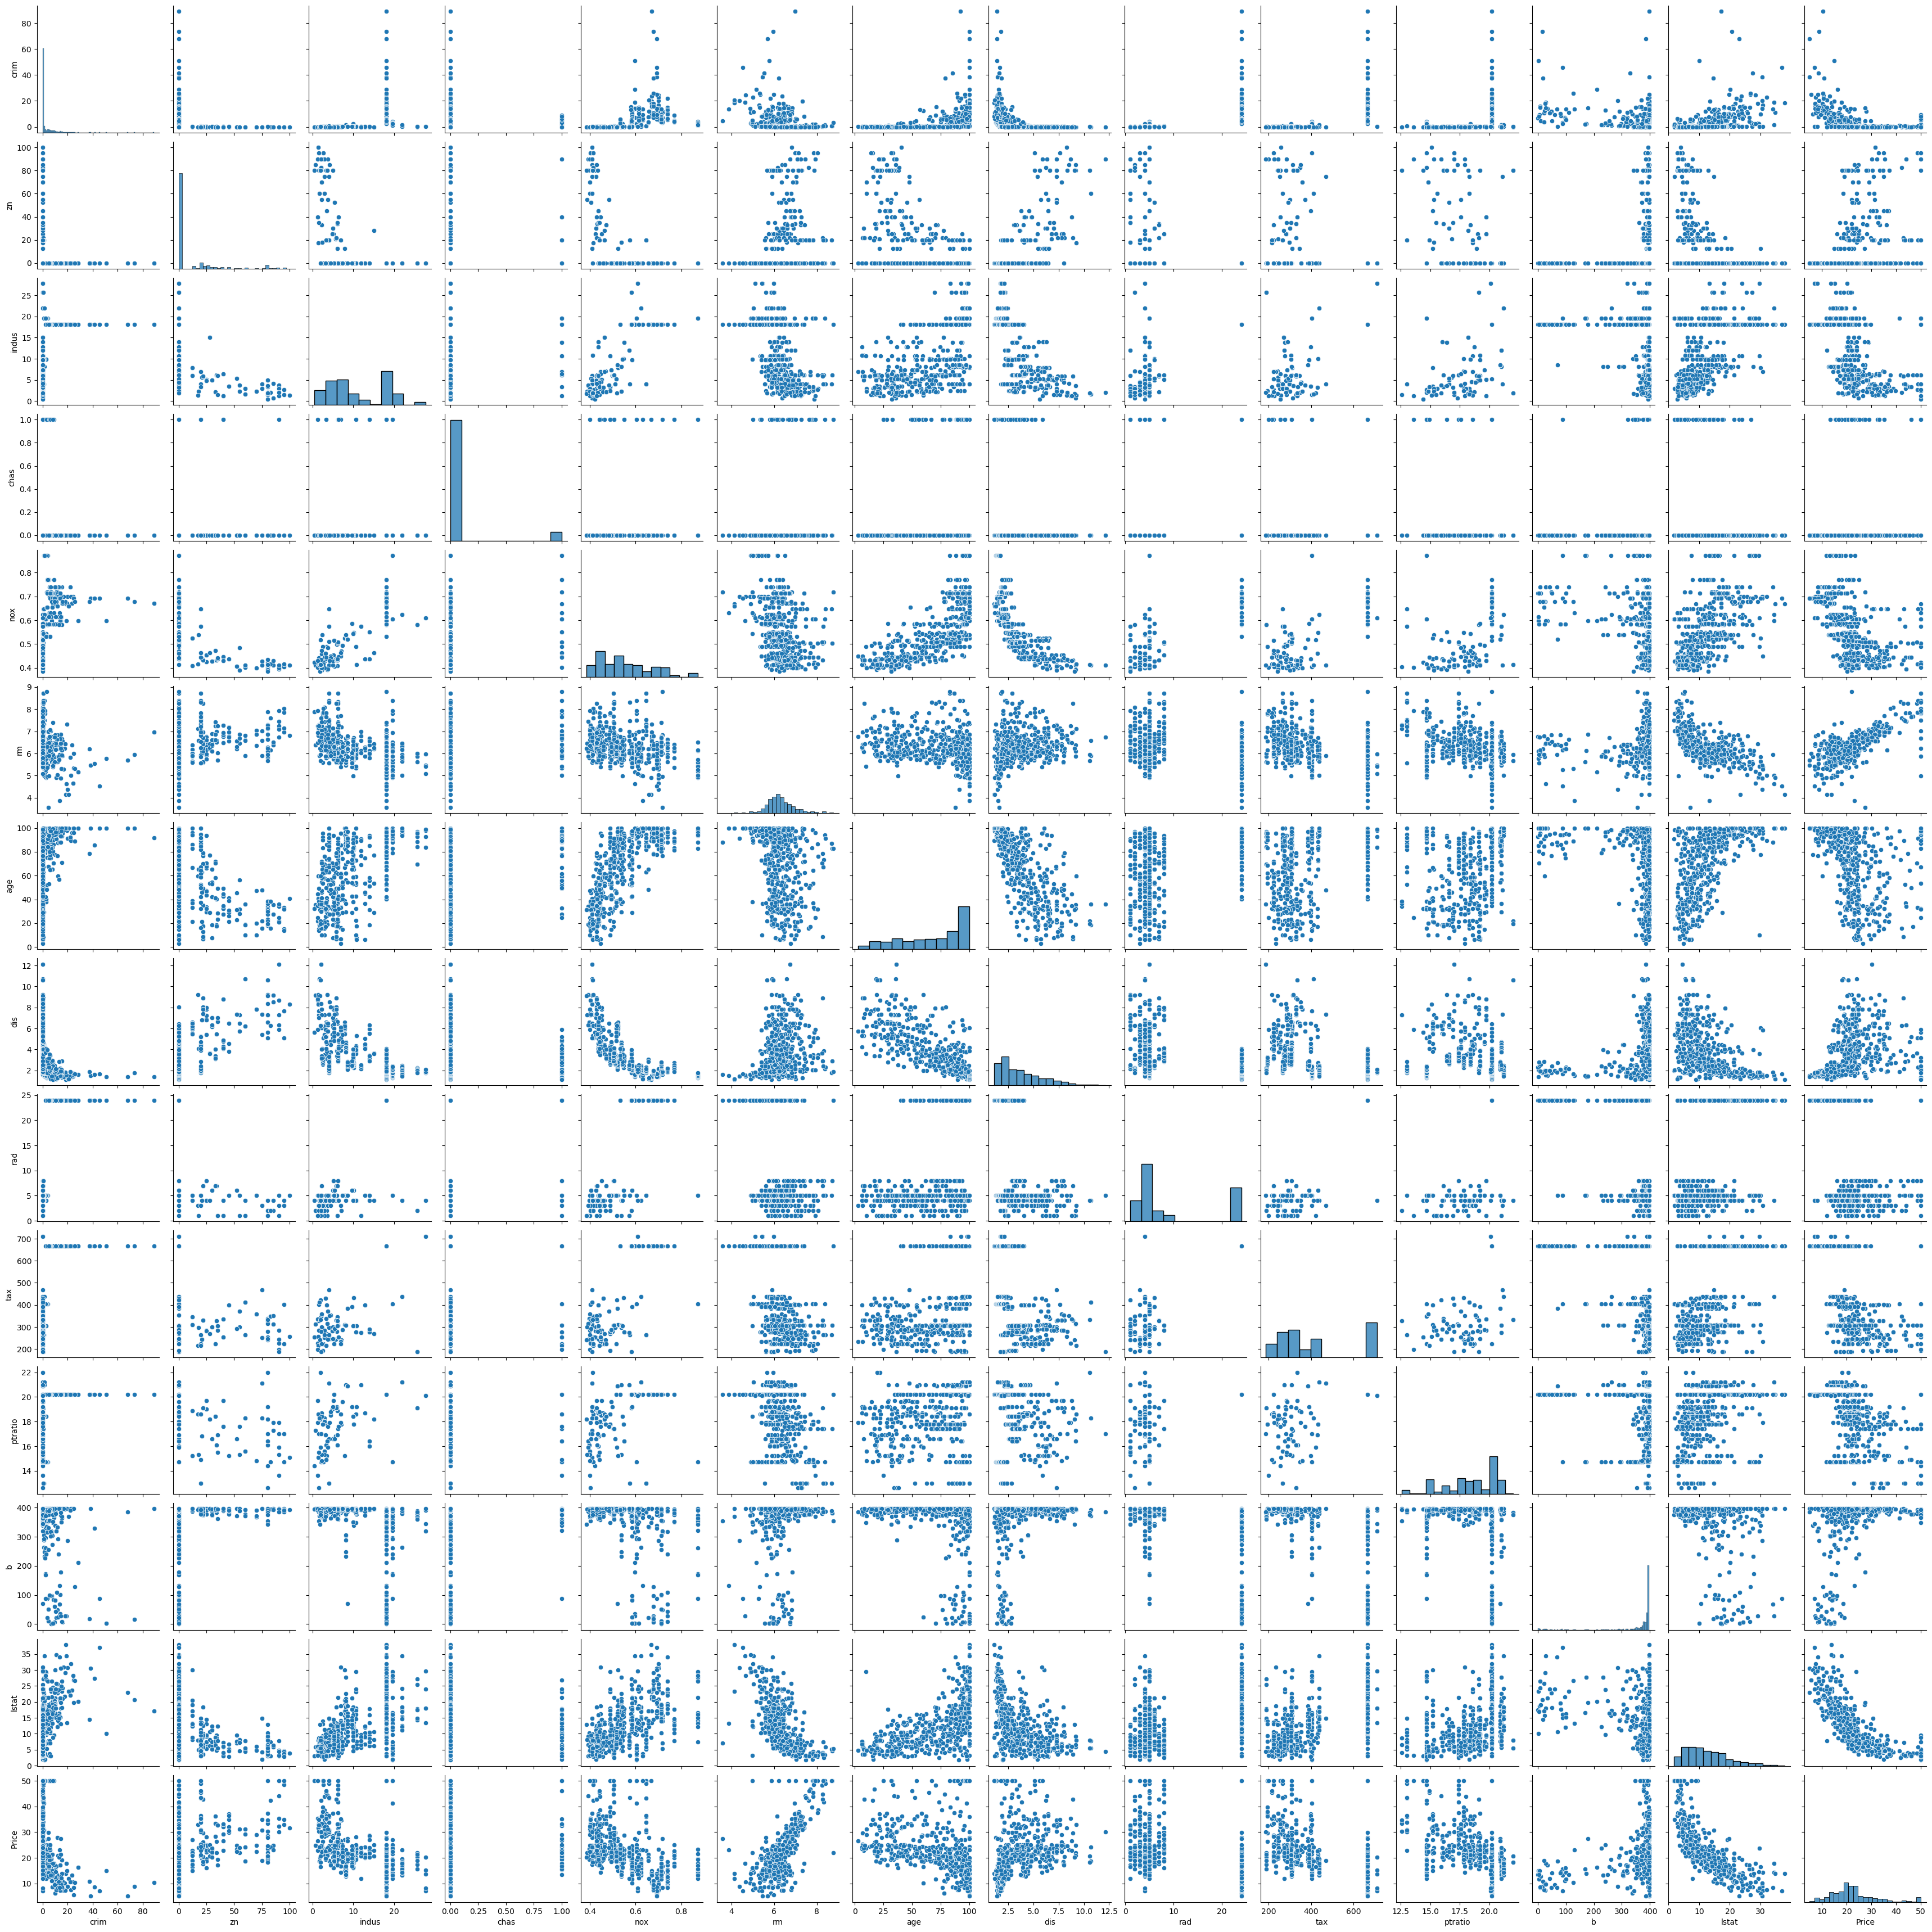

In [18]:
sns.pairplot(boston)
plt.show()

Analyzing the correlation features

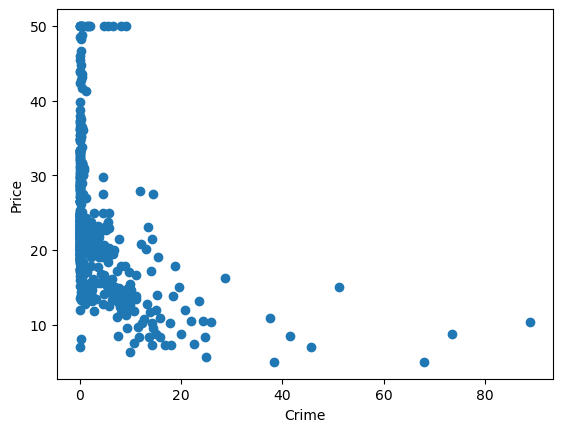

In [19]:
plt.scatter(boston['crim'],boston['Price'])
plt.xlabel('Crime')
plt.ylabel('Price')
plt.show()

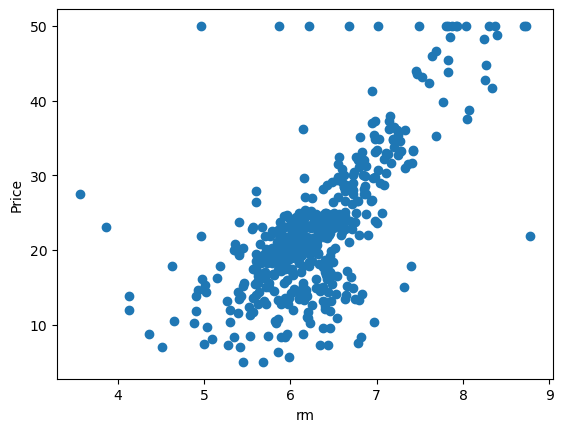

In [20]:
plt.scatter(boston['rm'],boston['Price'])
plt.xlabel('rm')
plt.ylabel('Price')
plt.show()

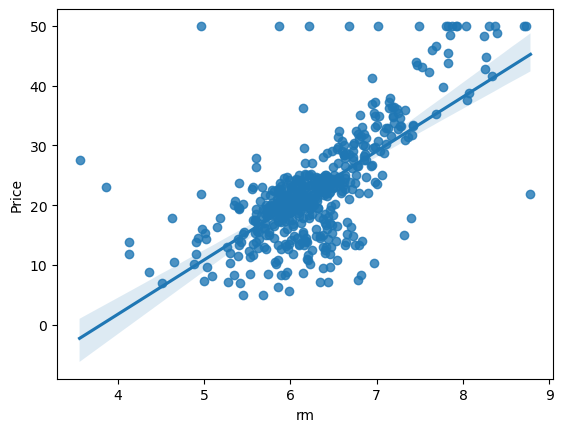

In [21]:
sns.regplot(x='rm',y='Price',data=boston)
plt.show()

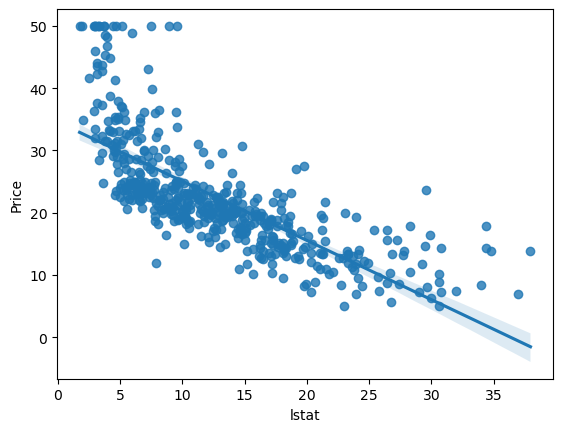

In [22]:
sns.regplot(x='lstat',y='Price',data=boston)
plt.show()

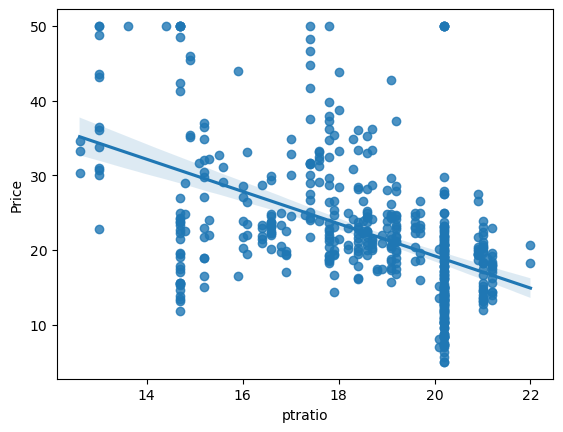

In [23]:
sns.regplot(x='ptratio',y='Price',data=boston)
plt.show()

In [24]:
# Independent and dependent feature

x=boston.iloc[:,:-1]
y=boston.iloc[:,-1]

In [25]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [26]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [29]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [30]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: Price, Length: 354, dtype: float64

In [31]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: Price, Length: 152, dtype: float64

In [32]:
#standardizing

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [36]:
x_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

Train Model

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
#print coefficient and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [39]:
print(regression.intercept_)

23.01581920903955


In [40]:
#on which parameter model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [41]:
#prediction with test data
reg_predict=regression.predict(x_test)
reg_predict

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

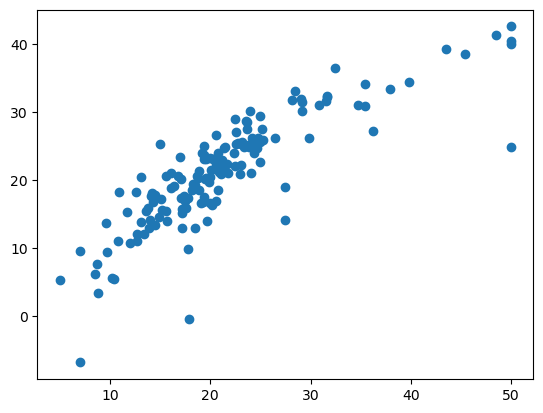

In [42]:
#plot scatter plot for prediction
plt.scatter(y_test,reg_predict)
plt.show()

In [43]:
#residulas
residuals=y_test-reg_predict
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

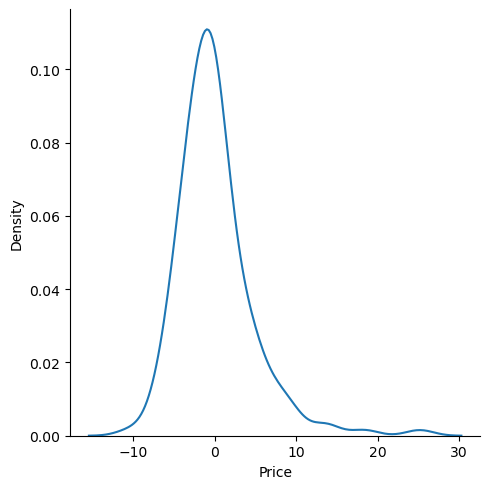

In [44]:
#plot residulals
sns.displot(residuals,kind='kde')
plt.show()

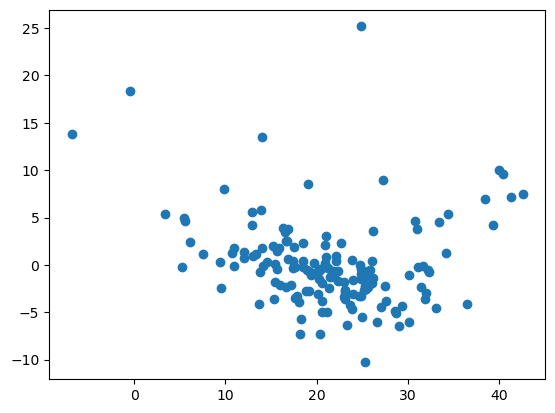

In [45]:
#scatter plot w.r.t prediction and residual
plt.scatter(reg_predict,residuals)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_predict))
print(mean_absolute_error(y_test,reg_predict))
print(np.sqrt(mean_absolute_error(y_test,reg_predict)))


21.517444231177205
3.1627098714574053
1.778400931021294


In [47]:
#R square and Adjusted r square

In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_predict)
print(score)


0.7112260057484934


Adjusted r2

In [49]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6840226584639312

New data prediction

In [50]:
boston.values[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00, 2.400e+01]])

In [53]:
#transformation of new data
scaler.transform(boston.values[0,:-1].reshape(1,-1))

C:\Notebook config\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [54]:
regression.predict(scaler.transform(boston.values[0,:-1].reshape(1,-1)))

C:\Notebook config\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

Pickling the model file for deployment

In [55]:
import pickle

In [57]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [58]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [59]:
pickled_model.predict(scaler.transform(boston.values[0,:-1].reshape(1,-1)))

C:\Notebook config\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])